##**Linear Regression on Icecream**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df=pd.read_csv('/content/Ice Cream (2).csv')
df

,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317
...,...,...
495,22.3,525
496,32.9,756
497,12.6,307
498,22.4,567


In [ ]:
df.head()


,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317


In [ ]:
df.tail()

,Temperature,Revenue
495,22.3,525
496,32.9,756
497,12.6,307
498,22.4,567
499,29.0,656


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


**Preprocessing**

In [ ]:
df.info()

,0
Temperature,0
Revenue,0


In [ ]:
#Rename colums(if needed)
df.columns= df.columns.str.strip().str.lower() #lower case
# assume dataset has "temperature" and "revenue"
x=df[['temperature']]
y=df['revenue']

**Exploratory Data Analysis**

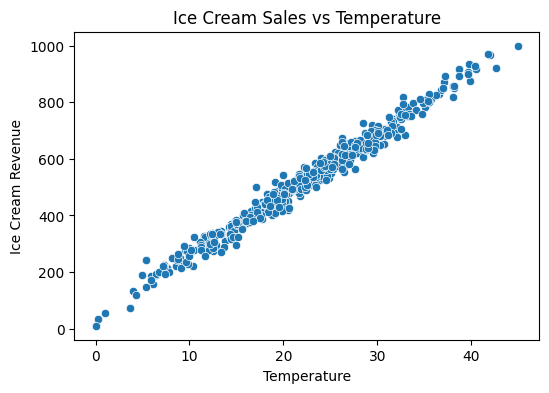

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='temperature',y='revenue',data=df)
plt.title("Ice Cream Sales vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("Ice Cream Revenue")
plt.show()

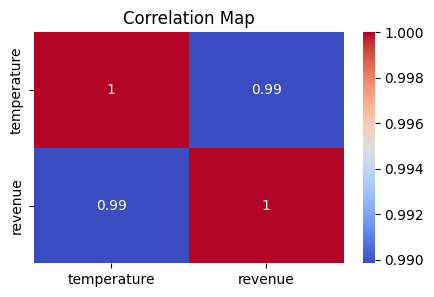

In [ ]:
# correlation Heatmap
plt.figure(figsize=(5,3))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Map")
plt.show()

**Train-Test Split**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((400, 1), (100, 1), (400,), (100,))

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

print("\nModel Training Completed!")
print("Slope (Coefficient):", model.coef_[0])
print("Intercept:",model.intercept_)


Model Training Completed!
Slope (Coefficient): 21.384000731002768
Intercept: 46.17834580774047


**Prediction**

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([683.42156759, 632.09996584, 559.39436335, 499.5191613 ,
       614.99276525, 304.92475465, 285.67915399, 315.61675502,
       505.93436152, 685.55996766, 724.05116898, 401.15275794,
       431.09035897, 672.72956723,  52.59354603, 200.14315107,
       523.04156211, 563.6711635 , 585.05516423, 683.42156759,
       557.25596328, 783.92637103, 655.62236664, 570.08636372,
       912.23037541, 666.31436701, 315.61675502, 632.09996584,
       732.60476927, 698.3903681 , 435.36715911, 471.71996035,
       711.22076854, 801.03357161, 640.65356613, 493.10396109,
       745.43516971, 317.75515509, 262.15675319, 131.71434873,
       582.91676416, 230.08075209, 548.70236299, 392.59915765,
       437.50555919, 593.60876452, 572.22476379, 125.29914851,
       475.9967605 , 531.5951624 , 623.54636554, 503.79596145,
       484.55036079, 499.5191613 , 550.84076306, 632.09996584,
       574.36316386, 679.14476745, 172.34395012, 662.03756686,
       585.05516423, 704.80556832, 535.87196255, 629.96

**Performance Evaluation**

In [ ]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

print("\nPerformance Metrics:")
print(f"Mean Squared Error(MSE:): {mse:.4f}")
print(f"Root Mean Sqaured Error(RMSE):{rmse:.4f}")
print(f"R2 Score:{r2:.4f}")


Performance Metrics:
Mean Squared Error(MSE:): 652.4938
Root Mean Sqaured Error(RMSE):25.5440
R2 Score:0.9772


**Visualization: Regression Line**

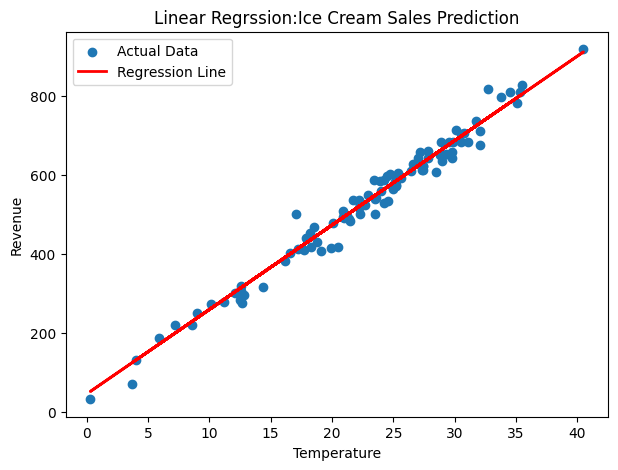

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(x_test,y_test,label="Actual Data")
plt.plot(x_test,y_pred,color='red',linewidth=2,label="Regression Line")
plt.xlabel("Temperature")
plt.ylabel("Revenue")
plt.title("Linear Regrssion:Ice Cream Sales Prediction")
plt.legend()
plt.show()